In [ ]:
# 1. Read API from text file
# f = open("api.txt", "r")
# api_key = f.read()
api_key = '<<API KEY>>' # get API key from: https://app.assemblyai.com/

print('1. API is read ...: ', api_key)

In [ ]:
# 2. Retrieving audio file from YouTube video
!pip install pytube

from pytube import YouTube
video = YouTube("https://www.youtube.com/watch?v=mkVjrB8g6mM")

yt = video.streams.get_audio_only()

yt.download()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00


'/content/What is the best way to learn data science.mp4'

In [ ]:
import os
current_dir = os.getcwd()

for file in os.listdir(current_dir):
    if file.endswith(".mp4"):
        mp4_file = os.path.join(current_dir, file)
        print(mp4_file)

print('2. Audio file has been retrieved from YouTube video: ', mp4_file)

/content/What is the best way to learn data science.mp4
2. Audio file has been retrieved from YouTube video:  /content/What is the best way to learn data science.mp4


In [ ]:
# 3. Upload YouTube audio file to AssemblyAI

import sys
import time
import requests

filename = mp4_file

def read_file(filename, chunk_size=5242880):
    with open(filename, 'rb') as _file:
        while True:
            data = _file.read(chunk_size)
            if not data:
                break
            yield data

headers = {'authorization': api_key}
response = requests.post('https://api.assemblyai.com/v2/upload',
                         headers=headers,
                         data=read_file(filename))

audio_url = response.json()['upload_url']

print('3. YouTube audio file has been uploaded to AssemblyAI: ', audio_url)

3. YouTube audio file has been uploaded to AssemblyAI:  https://cdn.assemblyai.com/upload/ec468892-8943-4d5d-8a9e-e1e816590399


In [ ]:
# 4. Transcribe uploaded audio file

import requests

endpoint = "https://api.assemblyai.com/v2/transcript"

json = {
  "audio_url": audio_url
}

headers = {
    "authorization": api_key,
    "content-type": "application/json"
}

transcript_input_response = requests.post(endpoint, json=json, headers=headers)

print('4. Transcribing uploaded file: ', transcript_input_response.json())

4. Transcribing uploaded file:  {'id': '6ng9sa555u-9d18-4f73-87eb-ebde5dbb7461', 'language_model': 'assemblyai_default', 'acoustic_model': 'assemblyai_default', 'language_code': 'en_us', 'status': 'queued', 'audio_url': 'https://cdn.assemblyai.com/upload/ec468892-8943-4d5d-8a9e-e1e816590399', 'text': None, 'words': None, 'utterances': None, 'confidence': None, 'audio_duration': None, 'punctuate': True, 'format_text': True, 'dual_channel': None, 'webhook_url': None, 'webhook_status_code': None, 'webhook_auth': False, 'webhook_auth_header_name': None, 'speed_boost': False, 'auto_highlights_result': None, 'auto_highlights': False, 'audio_start_from': None, 'audio_end_at': None, 'word_boost': [], 'boost_param': None, 'filter_profanity': False, 'redact_pii': False, 'redact_pii_audio': False, 'redact_pii_audio_quality': None, 'redact_pii_policies': None, 'redact_pii_sub': None, 'speaker_labels': False, 'content_safety': False, 'iab_categories': False, 'content_safety_labels': {}, 'iab_catego

In [ ]:
# 5. Extract transcript ID

transcript_id = transcript_input_response.json()["id"]

print('5. Extract transcript ID: ',transcript_id)

5. Extract transcript ID:  6ng9sa555u-9d18-4f73-87eb-ebde5dbb7461


In [ ]:
# 6. Retrieve transcription results
endpoint = f"https://api.assemblyai.com/v2/transcript/{transcript_id}"
headers = {
    "authorization": api_key,
}

transcript_output_response = requests.get(endpoint, headers=headers)

print('6. Retrieve transcription results: ',transcript_output_response)

6. Retrieve transcription results:  <Response [200]>


In [ ]:
transcript_output_response.json()['status']

'processing'

In [ ]:
from time import sleep

while transcript_output_response.json()['status'] != 'completed':
  sleep(5)
  print('Transcription is processing ...')
  transcript_output_response = requests.get(endpoint, headers=headers)


print(transcript_output_response.json()["status"])

Transcription is processing ...
Transcription is processing ...
completed


In [ ]:
transcript_output_response.json()

{'id': '6ng9sa555u-9d18-4f73-87eb-ebde5dbb7461',
 'language_model': 'assemblyai_default',
 'acoustic_model': 'assemblyai_default',
 'language_code': 'en_us',
 'status': 'completed',
 'audio_url': 'https://cdn.assemblyai.com/upload/ec468892-8943-4d5d-8a9e-e1e816590399',
 'text': "You. So what's the best way to learn data science? Well, the best way to learn data science is to do data science. And so if you're into this type of content, you want to consider subscribing for more tutorials and concept videos.",
 'words': [{'text': 'You.',
   'start': 330,
   'end': 830,
   'confidence': 0.59713,
   'speaker': None},
  {'text': 'So',
   'start': 980,
   'end': 1294,
   'confidence': 0.99837,
   'speaker': None},
  {'text': "what's",
   'start': 1332,
   'end': 1498,
   'confidence': 0.98918,
   'speaker': None},
  {'text': 'the',
   'start': 1514,
   'end': 1646,
   'confidence': 0.95,
   'speaker': None},
  {'text': 'best',
   'start': 1668,
   'end': 1902,
   'confidence': 0.99994,
   'sp

In [ ]:
# 7. Print transcribed text
print('Output:\n')
print(transcript_output_response.json()["text"])

Output:

You. So what's the best way to learn data science? Well, the best way to learn data science is to do data science. And so if you're into this type of content, you want to consider subscribing for more tutorials and concept videos.


In [ ]:
# 8. Save transcribed text to file

# Save as TXT file
yt_txt = open('yt.txt', 'w')
yt_txt.write(transcript_output_response.json()["text"])
yt_txt.close()

In [ ]:
# 9. Save as SRT file
srt_endpoint = endpoint + "/srt"
srt_response = requests.get(srt_endpoint, headers=headers)

with open("yt.srt", "w") as _file:
    _file.write(srt_response.text)

# Youtube Video Transcript Summarization with Hugging Face Transformers

In [ ]:
!pip install -q transformers
!pip install -q youtube_transcript_api
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.3 MB/s eta 0:00:00


In [ ]:
youtube_video = "https://www.youtube.com/watch?v=A4OmtyaBHFE"
video_id = youtube_video.split("=")[1]
video_id

'A4OmtyaBHFE'

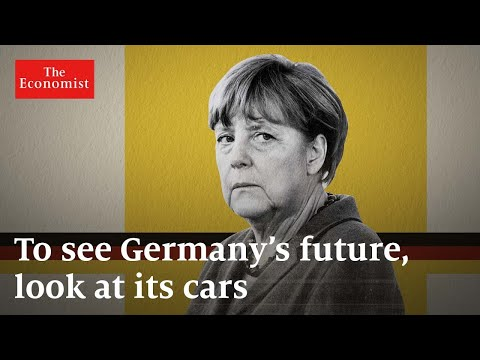

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)
print(transcript[0:5])

[{'text': "for Germany it's the end of an era and", 'start': 1.439, 'duration': 5.46}, {'text': "as Europe's biggest economy there are", 'start': 4.859, 'duration': 4.801}, {'text': 'some huge challenges ahead', 'start': 6.899, 'duration': 4.32}, {'text': 'from its increasingly complex', 'start': 9.66, 'duration': 3.84}, {'text': 'relationship with China to climate', 'start': 11.219, 'duration': 4.98}]


In [ ]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


9003


In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 for Germany it's the end of an era and as Europe's biggest economy there are some huge challenges ahead from its increasingly complex relationship with China to climate change all eyes will be on how Germany's new leaders grapple with these issues but there's one German industry that reveals a lot about the country's prospects it's cars traditionally the car industry here has been very powerful there have been open doors to German Ministries to the Chancery Germany's car industry is a vital part of its economy with links to government that go back decades how this world renowned motor industry navigates the challenges ahead could tell you more than you think about Germany's future [Music] the curves the Precision it's Cutting Edge engineering like this that has helped Place car makers at the heart of the German economy and the industry has proved of Bellwether for the country's future prospects too since the 70s car exports have risen with Germany's wealth and influence ma

Your max_length is set to 142, but your input_length is only 4. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


Summarized text
 economist's assessment of Germany's future after Angela Merkel . Germany risks losing competitiveness throughout its economy . Germany has to do better right we have those very big companies this very big players here but they aren't the disruptor the driver behind in Innovation disruption comes always for me new Young companies which Drive change .
input text 
ibe
Summarized text
 ibe ibe. ibe . ibe is the world's first female president . She was elected to the U.S. Senate in 2008 . ibi is the first woman to hold a Senate seat in Congress to represent the nation's first black president . The U.N. Senate is the second chamber in the world to hold the chamber chamber .


In [ ]:
len(str(summarized_text))

3240

In [ ]:
str(summarized_text)

'[" Germany\'s car industry is a vital part of its economy with links to government that go back decades . The industry has proved of Bellwether for the country\'s future prospects too since the 70s car exports have risen with Germany\'s wealth and influence manufacturing manufacturing since the 1970s .", " In 2000 seven of the world\'s most valuable companies were German but in the past two decades that number has fallen to just three . Almost half of Germany\'s GDP comes from exports cars make up the biggest proportion of this who Germany Sells Cars to matters it can point to alliances or trouble brewing .", " In 1998 German trade with China was worth 16 billion dollars dollars now it\'s worth over 180 billion . There\'s a fear that Germany could have become too reliant on the Chinese market for the past 16 years . Angela Merkel has courted China in the name of trade but there\'s a worry of putting all of your eggs in the Chinese basket might leave you exposed to some of the ill Wind

In [ ]:
#IMP: CONSOLIDATED: BEST
!pip install -q transformers
!pip install -q youtube_transcript_api
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

youtube_video = "https://www.youtube.com/watch?v=mkVjrB8g6mM"

video_id = youtube_video.split("=")[1]
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
# print(len(result))
summarizer = pipeline('summarization')

num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 142, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


input text 
 so what's the best way to learn data science well the best way to learn data science is to do data science and so if you're into this type of content you want to consider subscribing for more tutorials and concept videos
Summarized text
 The best way to learn data science is to do data science, according to the author of the book, is to learn from data science . If you're into this type of content you want to consider subscribing for more tutorials and concept videos.   so what's the best way of learning data science?


#Distill Whisper  - "ONLY English" Speech-to-Text

In [ ]:
!pip install -q transformers accelerate datasets[audio]
# !pip install -q flash-attn --no-build-isolation
!pip install --q optimum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.5/396.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
import textwrap

wrapper = textwrap.TextWrapper(width=80,
    initial_indent=" " * 8,
    subsequent_indent=" " * 8,
    break_long_words=False,
    break_on_hyphens=False)

In [ ]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
# from optimum.bettertransformer import BetterTransformer

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

In [ ]:
model_id = "distil-whisper/distil-medium.en"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True#, use_flash_attention_2=True
)
model.to(device)
model = model.to_bettertransformer() # we are using optimum BetterTransformer since Flash Attention 2 isn't supported on Colab

The BetterTransformer implementation does not support padding during training, as the fused kernels do not support attention masks. Beware that passing padded batched data during training may result in unexpected outputs. Please refer to https://huggingface.co/docs/optimum/bettertransformer/overview for more details.


In [ ]:
processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    max_new_tokens=128,
    chunk_length_s=15, #long form transcription
    batch_size=16,
    torch_dtype=torch_dtype,
    device=device,
)

from google.colab import files
# files.upload()
result = pipe('/content/tEST_aUDIO.aac')
#print(result["text"])

print(wrapper.fill(result["text"]))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


         Hi team I hope you're doing well. It would be great if you could help
        me in finding a new opportunity in the data analytics and or technical
        project manager role. From my 16 plus years of IT development experience
        I worked as project manager in the e-commerce domain for more than seven
        years with a few Fortune 500 companies in the supply chain domain. I
        have worked on predictive and prescriptive models. I have onshore
        project experience in London, UK in supply chain, logistics and retail
        domains. I have done PGB in data science and big data. My day-to-day
        activity includes gathering requirements from the business, working
        closely with data engineers, and working closely with the sales team for
        product demos or marketing. I request you to please add me to your
        network. I'd love to connect. Thank you again and keep in touch.
